# Comparison betweeen MLP and CNN using EuroSat

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report

### Load dataset

In [2]:
data_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

data_path = "./data/EuroSAT"

data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake'] 
)

Found 27000 images belonging to 10 classes.


### Train-Test Split

In [3]:
train_data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=8,
    subset='training',
    class_mode='categorical',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
)

Found 21600 images belonging to 10 classes.


In [4]:
test_data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=1,
    subset='validation',
    class_mode='categorical',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']   
)

Found 5400 images belonging to 10 classes.


## Model building using MLP

In [5]:
ann = keras.Sequential([
        keras.layers.Flatten(input_shape=(64,64,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])

visualkeras.layered_view(ann)

In [6]:
ann.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(train_data,validation_data=test_data, epochs=5)

Epoch 1/5
2700/2700 [==============================] - 27s 10ms/step - loss: 1.7346 - accuracy: 0.3446 - val_loss: 1.5009 - val_accuracy: 0.4674
Epoch 2/5
2700/2700 [==============================] - 26s 9ms/step - loss: 1.5269 - accuracy: 0.4331 - val_loss: 1.4898 - val_accuracy: 0.4552
Epoch 3/5
2700/2700 [==============================] - 26s 9ms/step - loss: 1.4394 - accuracy: 0.4706 - val_loss: 1.3921 - val_accuracy: 0.5067
Epoch 4/5
2700/2700 [==============================] - 26s 9ms/step - loss: 1.3767 - accuracy: 0.4960 - val_loss: 1.2634 - val_accuracy: 0.5387
Epoch 5/5
2700/2700 [==============================] - 26s 10ms/step - loss: 1.3324 - accuracy: 0.5144 - val_loss: 1.3430 - val_accuracy: 0.5117


In [7]:
ann.evaluate(test_data)

5400/5400 [==============================] - 10s 2ms/step - loss: 1.3486 - accuracy: 0.5083


[1.3485522270202637, 0.5083333253860474]

### Classification results from MLP

In [8]:
y_true = []
for i in range(test_data.samples // test_data.batch_size):
    _, batch_labels = test_data.next()
    y_true.extend(np.argmax(batch_labels, axis=-1))
    
# Generating predictions for test data
y_probab = ann.predict(test_data, steps=np.ceil(test_data.samples/test_data.batch_size))

#Generating predicted classes for test data
y_pred = np.argmax(y_probab, axis=-1)

#Generating confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Classification Report: \n", classification_report(y_true, y_pred))

5400/5400 [==============================] - 7s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.61      0.60       600
           1       0.53      0.47      0.50       600
           2       0.36      0.52      0.42       600
           3       0.38      0.04      0.08       500
           4       0.79      0.70      0.74       500
           5       0.66      0.37      0.47       400
           6       0.48      0.46      0.47       500
           7       0.58      0.48      0.53       600
           8       0.41      0.60      0.49       500
           9       0.50      0.78      0.61       600

    accuracy                           0.51      5400
   macro avg       0.53      0.50      0.49      5400
weighted avg       0.52      0.51      0.49      5400



### Plotting Confusion Matrix

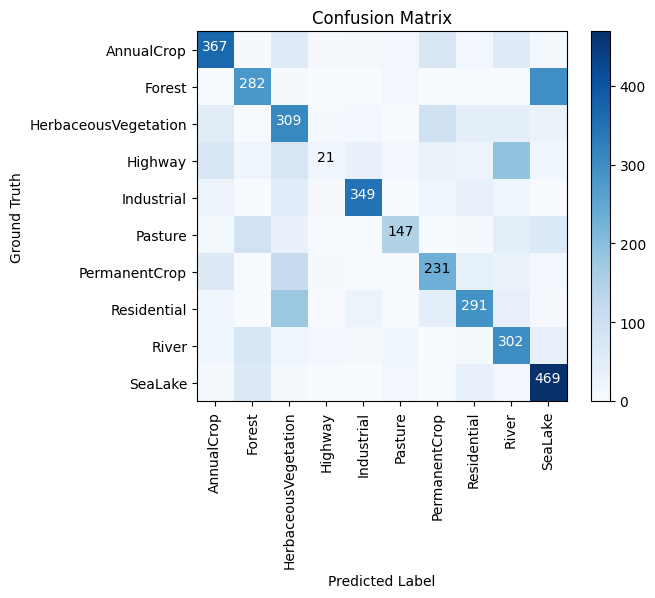

In [9]:
#plotting confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.class_indices))
plt.xticks(tick_marks, data.class_indices, rotation=90)
plt.yticks(tick_marks, data.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('Ground Truth')

# adding values in each cell
thresh = cm.max() / 2.
for i, j in zip(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

## Model building using CNN

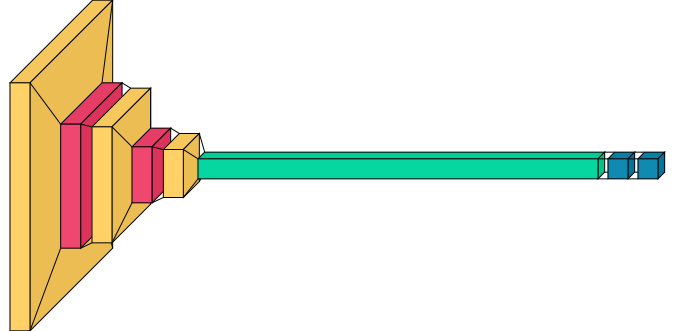

In [11]:
CNN = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10,activation='softmax')
])

visualkeras.layered_view(CNN)

In [12]:
CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

CNN.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
2700/2700 [==============================] - 30s 10ms/step - loss: 1.2783 - accuracy: 0.5170 - val_loss: 0.9620 - val_accuracy: 0.6548
Epoch 2/10
2700/2700 [==============================] - 28s 10ms/step - loss: 0.7787 - accuracy: 0.7175 - val_loss: 0.6639 - val_accuracy: 0.7681
Epoch 3/10
2700/2700 [==============================] - 27s 10ms/step - loss: 0.6238 - accuracy: 0.7738 - val_loss: 0.6175 - val_accuracy: 0.7802
Epoch 4/10
2700/2700 [==============================] - 27s 10ms/step - loss: 0.5428 - accuracy: 0.8060 - val_loss: 0.5901 - val_accuracy: 0.7848
Epoch 5/10
2700/2700 [==============================] - 27s 10ms/step - loss: 0.4779 - accuracy: 0.8305 - val_loss: 0.5448 - val_accuracy: 0.8076
Epoch 6/10
2700/2700 [==============================] - 28s 10ms/step - loss: 0.4299 - accuracy: 0.8477 - val_loss: 0.5098 - val_accuracy: 0.8200
Epoch 7/10
2700/2700 [==============================] - 28s 10ms/step - loss: 0.3863 - accuracy: 0.8623 - val_loss: 0.4791 -

In [13]:
CNN.evaluate(test_data)

5400/5400 [==============================] - 11s 2ms/step - loss: 0.5885 - accuracy: 0.8180


[0.5884708166122437, 0.8179629445075989]

### Classification results from CNN

In [14]:
y_true = []
for i in range(test_data.samples // test_data.batch_size):
    _, batch_labels = test_data.next()
    y_true.extend(np.argmax(batch_labels, axis=-1))

# Generating predictions for test data
y_probab = CNN.predict(test_data, steps=np.ceil(test_data.samples/test_data.batch_size))

#Generating predicted classes for test data
y_pred = np.argmax(y_probab, axis=-1)

#Generating confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Classification Report: \n", classification_report(y_true, y_pred))

5400/5400 [==============================] - 8s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.89      0.83       600
           1       0.99      0.83      0.91       600
           2       0.75      0.75      0.75       600
           3       0.70      0.76      0.73       500
           4       0.80      0.96      0.88       500
           5       0.72      0.86      0.78       400
           6       0.72      0.71      0.72       500
           7       0.98      0.65      0.78       600
           8       0.83      0.75      0.79       500
           9       0.91      0.99      0.95       600

    accuracy                           0.82      5400
   macro avg       0.82      0.82      0.81      5400
weighted avg       0.83      0.82      0.82      5400



### Plotting Confusion Matrix

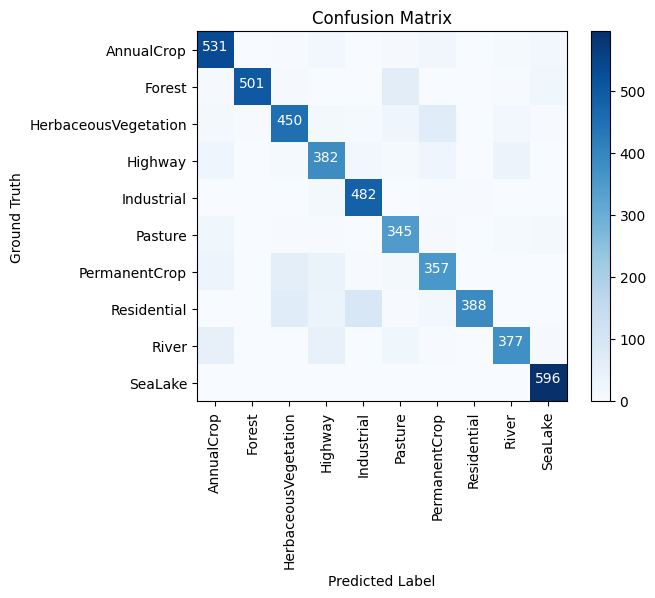

In [15]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.class_indices))
plt.xticks(tick_marks, data.class_indices, rotation=90)
plt.yticks(tick_marks, data.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('Ground Truth')

#adding values in each cell
thresh = cm.max() / 2.
for i, j in zip(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

### Verifying few samples

In [16]:
# Select 10 sample images from the test data
sample_data = []
for i in range(10):
    sample_data.append(test_data[i][0][0])
    
#print(sample_data) 

In [17]:
# Generating predictions for sample images
y_prob = CNN.predict(np.array(sample_data))

# Getting predicted classes for the sample images
y_pred = np.argmax(y_prob, axis=-1)

#print(y_pred)

1/1 [==============================] - 0s 261ms/step


In [18]:
# Getting all class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}

#print(class_labels)

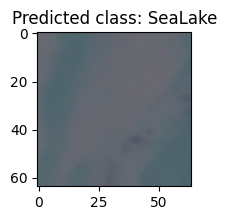

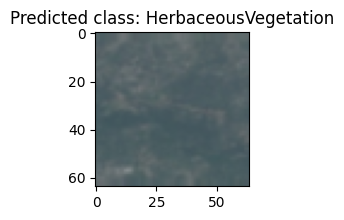

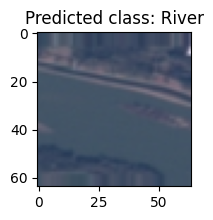

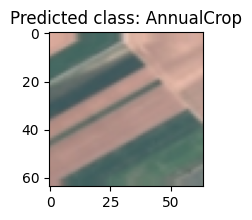

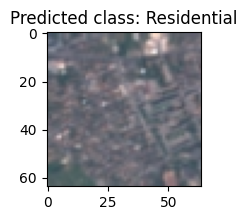

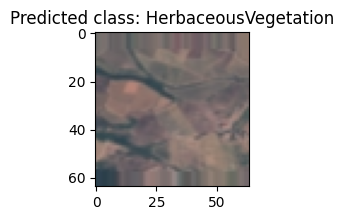

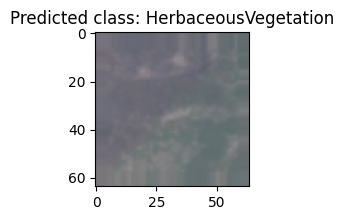

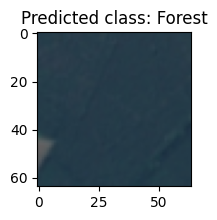

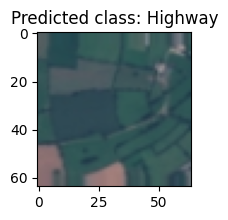

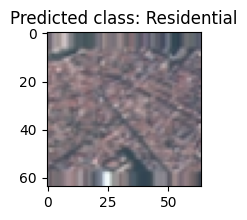

In [19]:
# Save classification results for each sample image
for i in range(len(y_pred)):
    label = class_labels[y_pred[i]]
    plt.figure(figsize=(2,2))
    plt.title('Predicted class: {}'.format(label))
    plt.imshow(sample_data[i])